In [ ]:
import pandas as pd


# Load the four datasets
d1 = pd.read_csv('/content/drive/MyDrive/audata/text/Autism-Child-Data.csv')
d2 = pd.read_csv('/content/drive/MyDrive/audata/text/train.csv')
d3 = pd.read_csv('/content/drive/MyDrive/audata/text/X_prepared.csv')
d4 = pd.read_csv('/content/drive/MyDrive/audata/text/Toddler Autism dataset July 2018.csv')


In [ ]:
# Rename columns using a dictionary
d1 = d1.rename(columns={
    'A1_Score': 'A1',
    'A2_Score': 'A2',
    'A3_Score': 'A3',
    'A4_Score': 'A4',
    'A5_Score': 'A5',
    'A6_Score': 'A6',
    'A7_Score': 'A7',
    'A8_Score': 'A8',
    'A9_Score': 'A9',
    'A10_Score': 'A10',
    'jundice': 'Jaundice',
    'Class':'Class/ASD',
    'ethnicity': 'Ethnicity',
    'relation': 'Who completed the test'
})
d2 = d2.rename(columns={
    'A1_Score': 'A1',
    'A2_Score': 'A2',
    'A3_Score': 'A3',
    'A4_Score': 'A4',
    'A5_Score': 'A5',
    'A6_Score': 'A6',
    'A7_Score': 'A7',
    'A8_Score': 'A8',
    'A9_Score': 'A9',
    'A10_Score': 'A10',
    'jundice': 'Jaundice',
    'Class':'Class/ASD',
    'ethnicity': 'Ethnicity'
})
d3 = d3.rename(columns={
    'A1_Score': 'A1',
    'A2_Score': 'A2',
    'A3_Score': 'A3',
    'A4_Score': 'A4',
    'A5_Score': 'A5',
    'A6_Score': 'A6',
    'A7_Score': 'A7',
    'A8_Score': 'A8',
    'A9_Score': 'A9',
    'A10_Score': 'A10',
    'jundice': 'Jaundice',
    'austim': 'Class/ASD',
    'ethnicity': 'Ethnicity'
})
d2 = d2.rename(columns={'jaundice':'Jaundice'})
d3 = d3.rename(columns={'jaundice':'Jaundice'})
d4 = d4.rename(columns={
    'Sex':'gender',
    'Class/ASD Traits ':'Class/ASD',
    'Age_Mons':'age',

})

d4['age'] = (d4['age'] / 12).round(3)

In [ ]:
data=pd.concat([d1,d2,d3,d4],axis=0)

In [ ]:
dataCB = data.drop(columns=['ID', 'result', 'Case_No','used_app_before','Family_mem_with_ASD','Qchat-10-Score','austim','contry_of_res','age_desc','Who completed the test','relation'])


In [ ]:
# Standardize gender entries to 'F' for female and 'M' for male
replacements = {
    'f': 'F',
    'm': 'M',
    0: 'M',
    1: 'F'
}
dataCB['gender'] = dataCB['gender'].replace(replacements)

# Standardize and clean up 'Ethnicity' entries
replacements = {
    "'Middle Eastern '": 'Middle Eastern',  # Remove extra spaces and quotes
    "Middle Eastern ": 'Middle Eastern',   # Trim trailing space
    "?": 'Others',                         # Replace unknown entries with 'Others'
    # Convert numeric codes to 'Others'
    10: 'Others',
    8: 'Others',
    2: 'Others',
    1: 'Others',
    5: 'Others',
    0: 'Others',
    11: 'Others',
    4: 'Others',
    9: 'Others',
    6: 'Others',
    3: 'Others',
    7: 'Others'
}
dataCB['Ethnicity'] = dataCB['Ethnicity'].replace(replacements)
# Fill any remaining NaNs in 'Ethnicity' with 'Others'
dataCB['Ethnicity'] = dataCB['Ethnicity'].fillna('Others')

# Additional cleaning for the 'Ethnicity' column
replacements = {
    'others': 'Others'
}
dataCB['Ethnicity'] = dataCB['Ethnicity'].replace(replacements)

# Convert numeric representations to 'yes' or 'no' for the 'Jaundice' column
replacements = {
    0: 'no',
    1: 'yes'
}
dataCB['Jaundice'] = dataCB['Jaundice'].replace(replacements)

# Standardize entries in 'Class/ASD' to 'NO' or 'YES'
replacements = {
    0: 'NO',
    1: 'YES',
    'No': 'NO',
    'Yes': 'YES'
}
dataCB['Class/ASD'] = dataCB['Class/ASD'].replace(replacements)

# Convert 'age' column to numeric, coercing errors to NaN
dataCB['age'] = pd.to_numeric(dataCB['age'], errors='coerce')

# Handle NaN values in 'age' by filling with the median age
dataCB['age'].fillna(dataCB['age'].median(), inplace=True)

dataCB.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,age,gender,Ethnicity,Jaundice,Class/ASD
0,1,1,0,0,1,1,0,1,0,0,6.0,M,Others,no,NO
1,1,1,0,0,1,1,0,1,0,0,6.0,M,Middle Eastern,no,NO
2,1,1,0,0,0,1,1,1,0,0,6.0,M,Others,no,NO
3,0,1,0,0,1,1,0,0,0,1,5.0,F,Others,yes,NO
4,1,1,1,1,1,1,1,1,1,1,5.0,M,Others,yes,YES


In [ ]:
dataCB.to_csv('/content/drive/MyDrive/audata/text/processedAuData.csv')

In [ ]:
# Convert 'Class/ASD' values from 'YES'/'NO' to binary 1/0
dataCB['Class/ASD'] = dataCB['Class/ASD'].map({'YES': 1, 'NO': 0})
# Encode categorical variables using one-hot encoding and drop the first category to avoid dummy variable trap
categorical_cols = ['gender', 'Ethnicity', 'Jaundice']
dataCB = pd.get_dummies(dataCB, columns=categorical_cols, drop_first=True)
dataCB.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,Ethnicity_South Asian,Ethnicity_Turkish,Ethnicity_White European,Ethnicity_White-European,Ethnicity_asian,Ethnicity_black,Ethnicity_middle eastern,Ethnicity_mixed,Ethnicity_south asian,Jaundice_yes
0,1,1,0,0,1,1,0,1,0,0,...,False,False,False,False,False,False,False,False,False,False
1,1,1,0,0,1,1,0,1,0,0,...,False,False,False,False,False,False,False,False,False,False
2,1,1,0,0,0,1,1,1,0,0,...,False,False,False,False,False,False,False,False,False,False
3,0,1,0,0,1,1,0,0,0,1,...,False,False,False,False,False,False,False,False,False,True
4,1,1,1,1,1,1,1,1,1,1,...,False,False,False,False,False,False,False,False,False,True


In [ ]:
for i in dataCB.columns:
    print(i)
    print(f"{dataCB[i].unique()}\n")

A1
[1 0]

A2
[1 0]

A3
[0 1]

A4
[0 1]

A5
[1 0]

A6
[1 0]

A7
[0 1]

A8
[1 0]

A9
[0 1]

A10
[0 1]

age
[6.    5.    4.    ... 2.583 2.25  1.333]

Class/ASD
[0 1]

gender_M
[ True False]

Ethnicity_Asian
[False  True]

Ethnicity_Black
[False  True]

Ethnicity_Hispanic
[False  True]

Ethnicity_Latino
[False  True]

Ethnicity_Middle Eastern
[False  True]

Ethnicity_Native Indian
[False  True]

Ethnicity_Others
[ True False]

Ethnicity_Pacifica
[False  True]

Ethnicity_Pasifika
[False  True]

Ethnicity_South Asian
[False  True]

Ethnicity_Turkish
[False  True]

Ethnicity_White European
[False  True]

Ethnicity_White-European
[False  True]

Ethnicity_asian
[False  True]

Ethnicity_black
[False  True]

Ethnicity_middle eastern
[False  True]

Ethnicity_mixed
[False  True]

Ethnicity_south asian
[False  True]

Jaundice_yes
[False  True]



Model: Logistic Regression
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.89      0.90       546
           1       0.83      0.87      0.85       338

    accuracy                           0.88       884
   macro avg       0.88      0.88      0.88       884
weighted avg       0.88      0.88      0.88       884



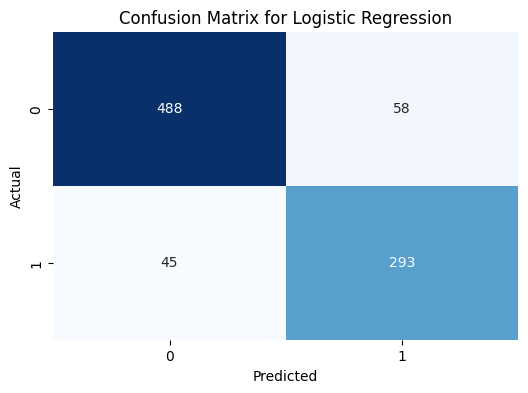

Model: Random Forest
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.92      0.92       546
           1       0.88      0.86      0.87       338

    accuracy                           0.90       884
   macro avg       0.89      0.89      0.89       884
weighted avg       0.90      0.90      0.90       884



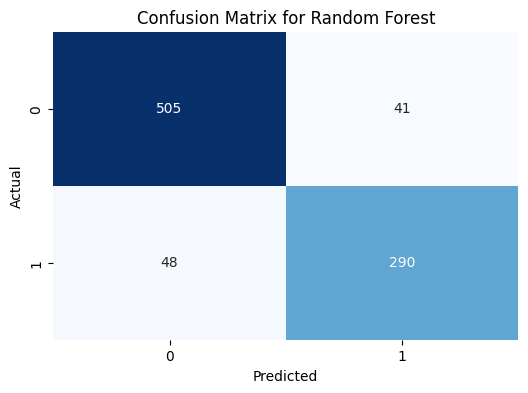

Model: XGBoost
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.93      0.92       546
           1       0.88      0.85      0.86       338

    accuracy                           0.90       884
   macro avg       0.89      0.89      0.89       884
weighted avg       0.90      0.90      0.90       884



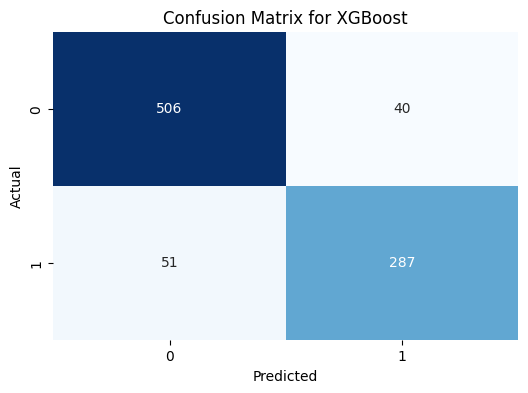

Model: Ensemble
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.93       546
           1       0.89      0.90      0.89       338

    accuracy                           0.92       884
   macro avg       0.91      0.91      0.91       884
weighted avg       0.92      0.92      0.92       884



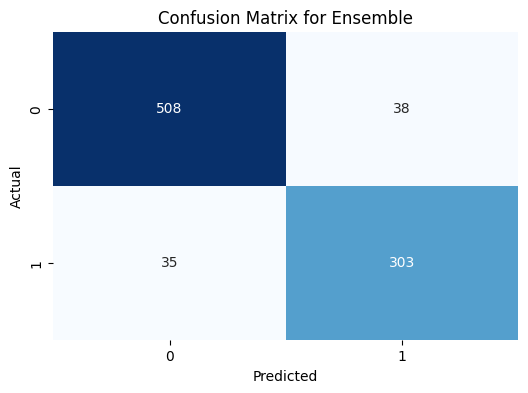

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd



# Separate features and target variable
X = dataCB.drop('Class/ASD', axis=1)
y = dataCB['Class/ASD']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the models
logreg = LogisticRegression(max_iter=1000, random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
xgboost = xgb.XGBClassifier(eval_metric='logloss', random_state=42)

# Fit each model individually
logreg.fit(X_train, y_train)
rf.fit(X_train, y_train)
xgboost.fit(X_train, y_train)

# Create an ensemble using Voting Classifier
ensemble = VotingClassifier(estimators=[
    ('logreg', logreg),
    ('rf', rf),
    ('xgboost', xgboost)
], voting='soft')

# Fit the ensemble model
ensemble.fit(X_train, y_train)

# Define a function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# List of models
models = [('Logistic Regression', logreg), ('Random Forest', rf), ('XGBoost', xgboost), ('Ensemble', ensemble)]

# Loop through each model and display confusion matrix and classification report
for model_name, model in models:
    y_pred = model.predict(X_test)
    print(f"Model: {model_name}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    plot_confusion_matrix(y_test, y_pred, model_name)


Model: Logistic Regression


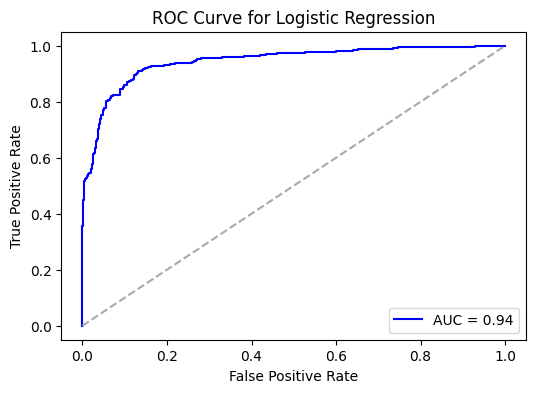

Model: Random Forest


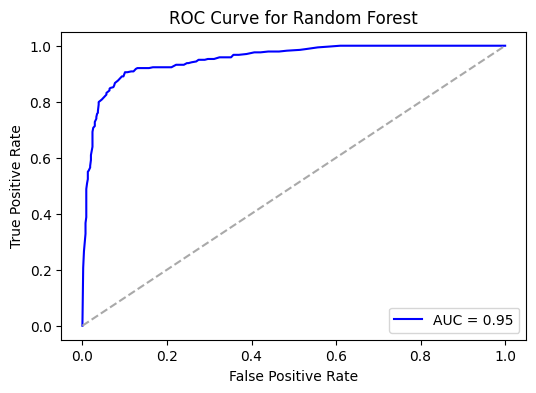

Model: XGBoost


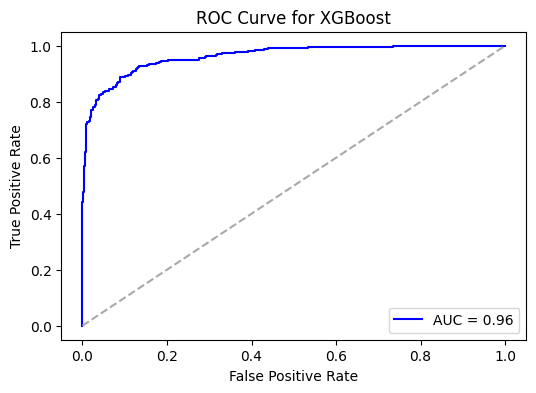

Model: Ensemble


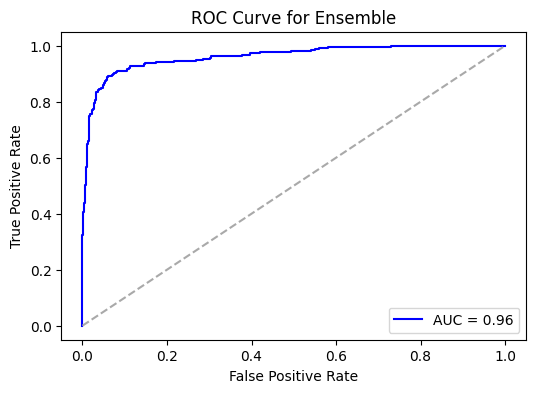

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Define a function to plot ROC curve
def plot_roc_curve(y_true, y_scores, model_name):
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    auc = roc_auc_score(y_true, y_scores)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc:.2f}')
    plt.plot([0, 1], [0, 1], color='darkgrey', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend(loc="lower right")
    plt.show()

# Loop through each model and display ROC curve
for model_name, model in models:
    y_scores = model.predict_proba(X_test)[:, 1]  # Get probability scores for the positive class
    print(f"Model: {model_name}")
    plot_roc_curve(y_test, y_scores, model_name)

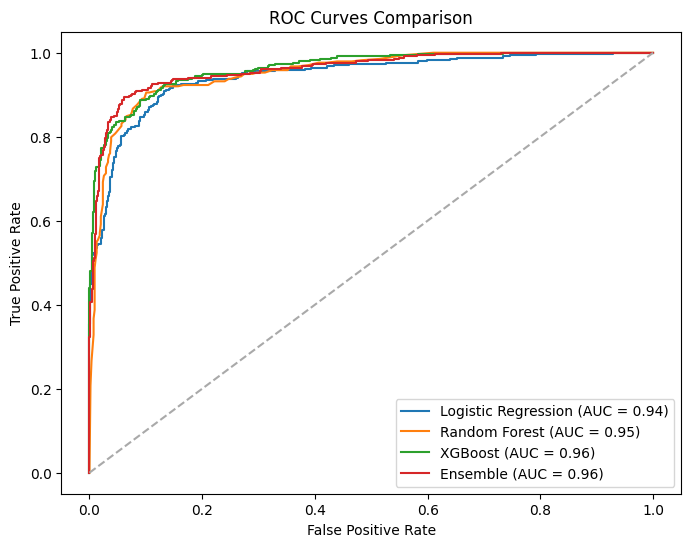

In [ ]:
plt.figure(figsize=(8, 6))

def add_roc_curve(y_true, y_scores, model_name):
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    auc = roc_auc_score(y_true, y_scores)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.2f})')

for model_name, model in models:
    y_scores = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
    add_roc_curve(y_test, y_scores, model_name)

plt.plot([0, 1], [0, 1], color='darkgrey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend(loc="lower right")
plt.show()


In [ ]:
dataVD = pd.read_csv('/content/drive/MyDrive/audata/text/processedAuData.csv')
dataVD.head()

,Unnamed: 0,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,age,gender,Ethnicity,Jaundice,Class/ASD
0,0,1,1,0,0,1,1,0,1,0,0,6.0,M,Others,no,NO
1,1,1,1,0,0,1,1,0,1,0,0,6.0,M,Middle Eastern,no,NO
2,2,1,1,0,0,0,1,1,1,0,0,6.0,M,Others,no,NO
3,3,0,1,0,0,1,1,0,0,0,1,5.0,F,Others,yes,NO
4,4,1,1,1,1,1,1,1,1,1,1,5.0,M,Others,yes,YES


<ipython-input-17-f1a17afcd2c6>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataVD, x=column, palette='viridis')


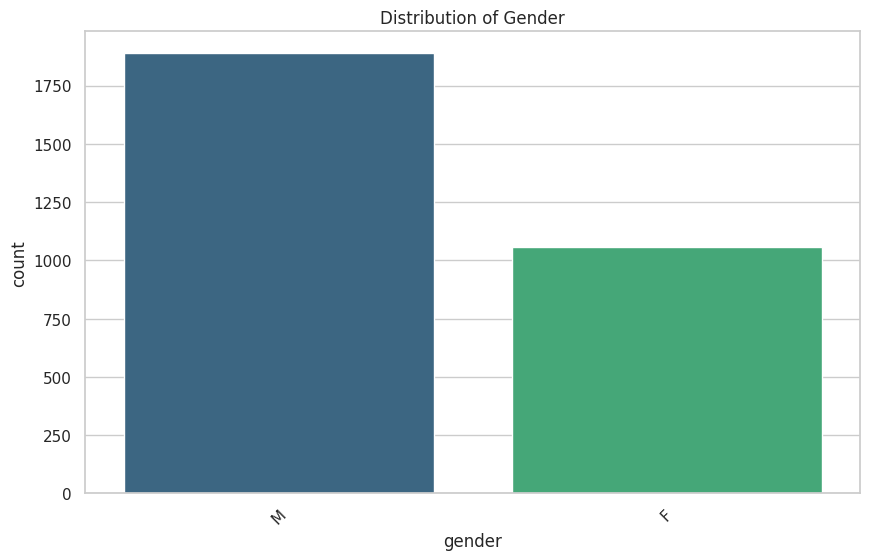

<ipython-input-17-f1a17afcd2c6>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataVD, x=column, palette='viridis')


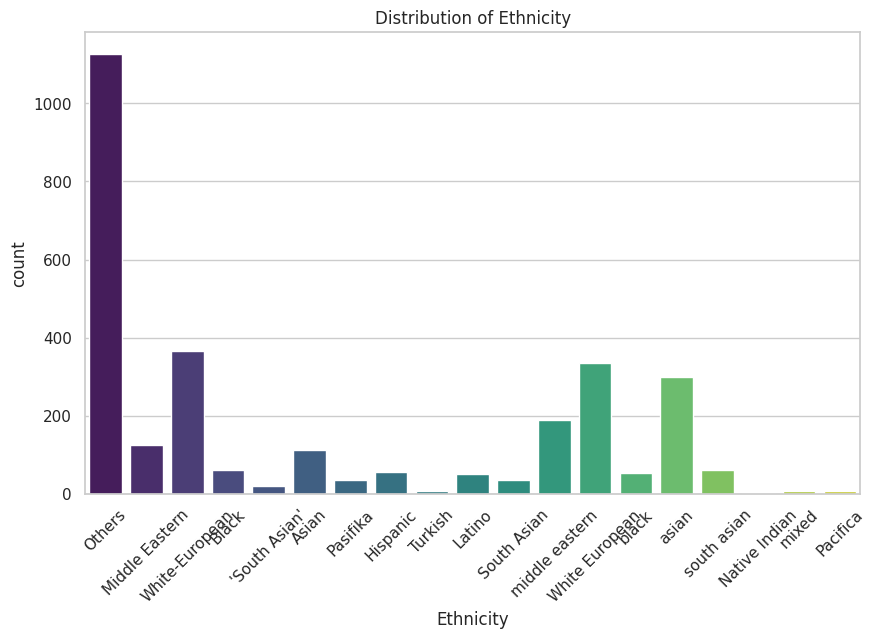

<ipython-input-17-f1a17afcd2c6>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataVD, x=column, palette='viridis')


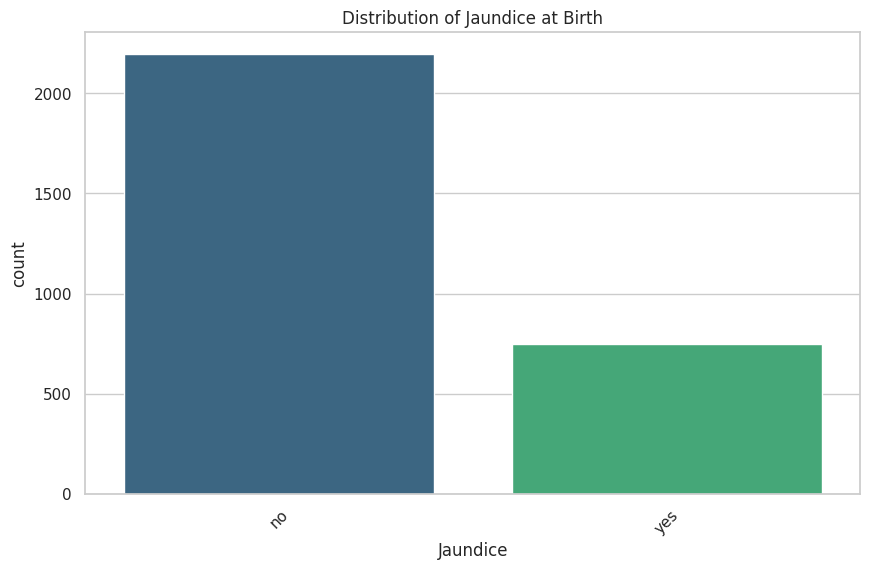

<ipython-input-17-f1a17afcd2c6>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataVD, x=column, palette='viridis')


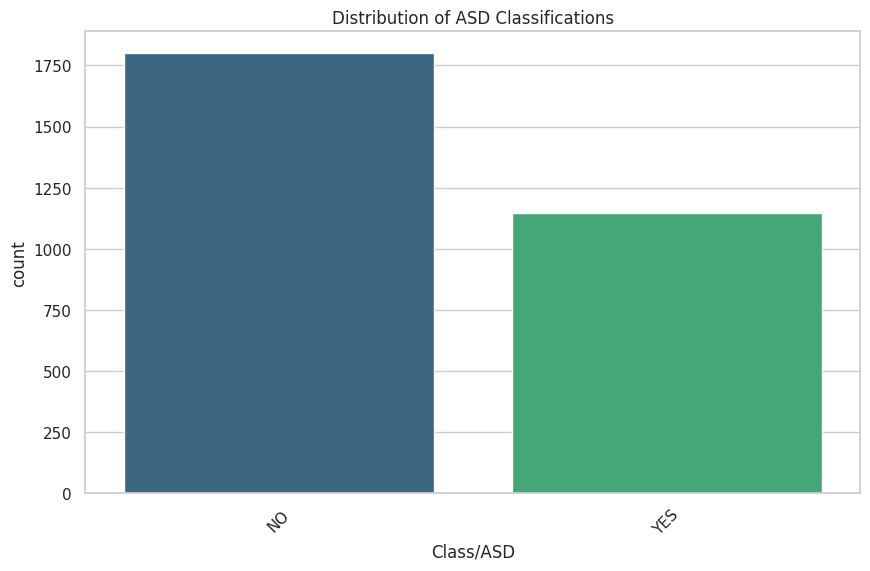

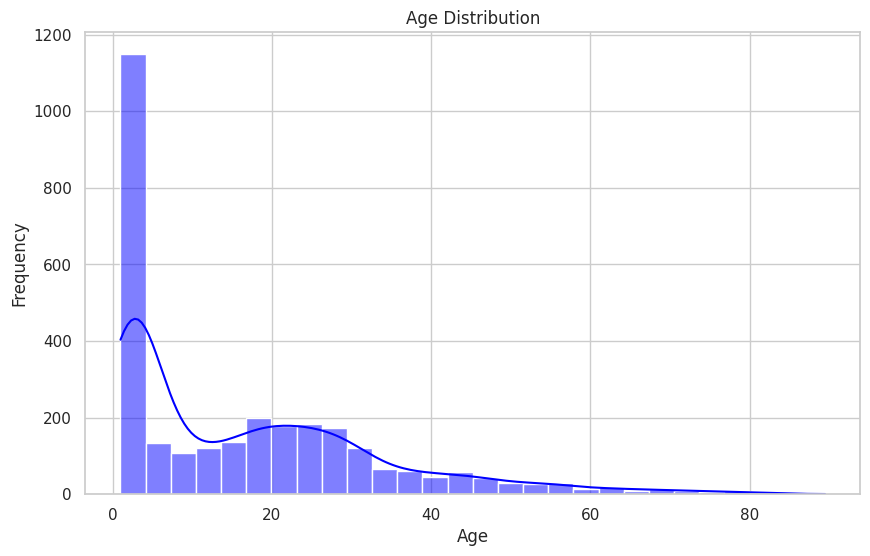

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Setting the aesthetic style for the plots
sns.set(style="whitegrid")

# Function to plot bar charts for categorical variables
def plot_bar(dataVD, column, title):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=dataVD, x=column, palette='viridis')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()

# Function to plot a histogram for the age distribution
def plot_histogram(dataVD, column, title):
    plt.figure(figsize=(10, 6))
    sns.histplot(dataVD[column], kde=True, color='blue')
    plt.title(title)
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    plt.show()

# Plotting the bar charts for categorical data
plot_bar(dataVD, 'gender', 'Distribution of Gender')
plot_bar(dataVD, 'Ethnicity', 'Distribution of Ethnicity')
plot_bar(dataVD, 'Jaundice', 'Distribution of Jaundice at Birth')
plot_bar(dataVD, 'Class/ASD', 'Distribution of ASD Classifications')

# Plotting the histogram for age
plot_histogram(dataVD, 'age', 'Age Distribution')

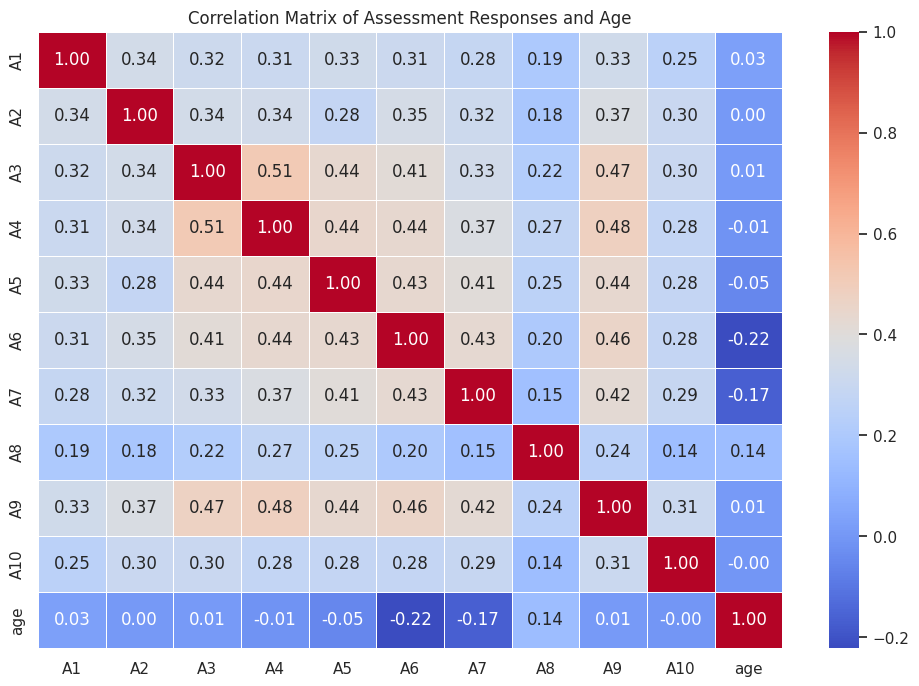

In [ ]:
# Extracting relevant columns for correlation analysis (responses and age)
relevant_columns = dataVD.columns[1:11].tolist() + ['age']
correlation_data = dataVD[relevant_columns]

# Calculating the correlation matrix
correlation_matrix = correlation_data.corr()

# Plotting the heatmap for the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Assessment Responses and Age')
plt.show()

The heatmap above displays the correlation matrix for the assessment responses (A1 to A10) and age. Here are some insights from this correlation analysis:

Response Correlations: Most of the assessment responses (A1 to A10) exhibit low to moderate correlations with each other. This suggests some level of interdependence among these features, which could be explored further in predictive modeling or deeper analysis.

Age Correlations: Age shows very low correlations with the assessment responses. This indicates that the responses to the assessment items are relatively independent of the age of the individuals in this dataset.

This correlation analysis helps in understanding the relationships between different variables, which can be crucial for tasks like feature selection in machine learning or identifying key factors in assessments.

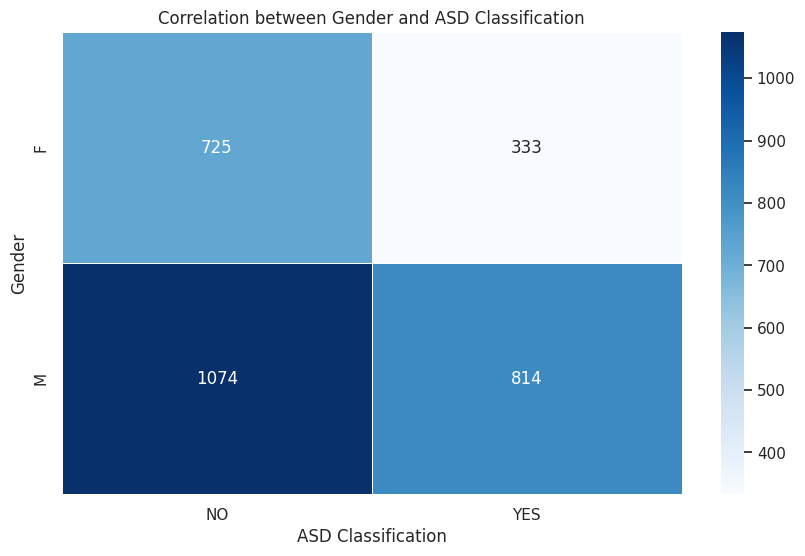

In [ ]:
# Creating a cross-tabulation of Gender vs ASD Classifications
gender_asd_crosstab = pd.crosstab(dataVD['gender'], dataVD['Class/ASD'])

# Plotting the crosstabulation as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(gender_asd_crosstab, annot=True, cmap='Blues', fmt='d', linewidths=.5)
plt.title('Correlation between Gender and ASD Classification')
plt.ylabel('Gender')
plt.xlabel('ASD Classification')
plt.show()


The heatmap visualizes the cross-tabulation of gender versus ASD classification in your dataset. Each cell in the heatmap indicates the count of individuals of a specific gender who have been classified as either having ASD or not. Here's what we can interpret:

The numbers show how many males and females have been diagnosed with ASD ('YES') and how many have not ('NO').
This visualization allows you to quickly assess if there's any noticeable disparity between genders in terms of ASD classification.

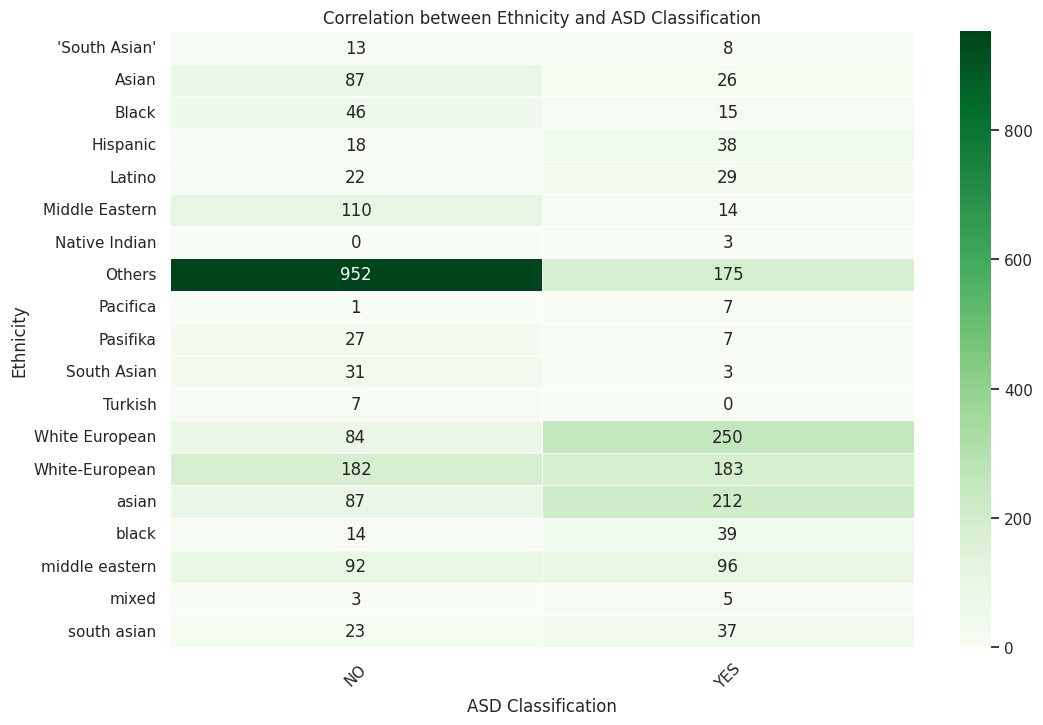

In [ ]:
# Creating a cross-tabulation of Ethnicity vs ASD Classifications
ethnicity_asd_crosstab = pd.crosstab(dataVD['Ethnicity'], dataVD['Class/ASD'])

# Plotting the crosstabulation as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(ethnicity_asd_crosstab, annot=True, cmap='Greens', fmt='d', linewidths=.5)
plt.title('Correlation between Ethnicity and ASD Classification')
plt.ylabel('Ethnicity')
plt.xlabel('ASD Classification')
plt.xticks(rotation=45)
plt.show()


The heatmap visualizes the cross-tabulation of ethnicity versus ASD classification in your dataset. Each cell in the heatmap shows the number of individuals from each ethnic group who are either diagnosed with ASD ('YES') or not ('NO'). Here's what this visualization reveals:

Ethnic Diversity: The diversity of ethnic groups in the dataset, with specific counts of ASD classifications for each.
ASD Distribution: How ASD diagnoses are distributed across different ethnicities. Certain groups may show higher or lower counts, which could warrant further investigation to understand potential influences or biases.
This visualization is helpful for identifying if there are any notable differences in ASD classification among different ethnic groups, which could be important for medical, sociological, or epidemiological research.